In [1]:
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import preprocessingFuncts as pp
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ratingData = pp.readRatingData('ml-100k\\ua.base').merge(
    pp.readItemData().drop(['title', 'year', 'year_category'], axis='columns'))
xTrain, yTrain = ratingData.drop(
    ['rating'], axis='columns'), ratingData.loc[:, 'rating']

testData = pp.readRatingData('ml-100k\\ua.test').merge(
    pp.readItemData().drop(['title', 'year', 'year_category'], axis='columns'))
testX, testY = testData.drop(
    ['rating'], axis='columns'), testData.loc[:, 'rating']


In [2]:
def testModel(model):
  model.fit(xTrain, yTrain)
  predY = model.predict(testX)

  # print(predY)
  print(classification_report(testY, predY))
  cm = confusion_matrix(
      testY, predY, labels=[1, 2, 3, 4, 5]
  )
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
  disp.plot()
  plt.show()


              precision    recall  f1-score   support

           1       0.09      0.03      0.04       542
           2       0.12      0.06      0.08       995
           3       0.27      0.38      0.32      2424
           4       0.38      0.41      0.39      3316
           5       0.23      0.20      0.21      2153

    accuracy                           0.29      9430
   macro avg       0.22      0.21      0.21      9430
weighted avg       0.27      0.29      0.28      9430



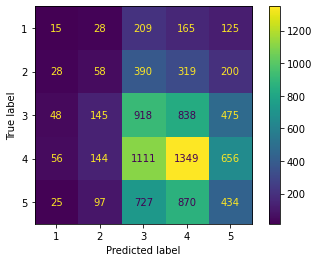

In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier())
testModel(clf)


<h1>Imma try other models too</h1>

c:\Users\scarl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\scarl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       542
           2       0.00      0.00      0.00       995
           3       0.30      0.18      0.22      2424
           4       0.37      0.87      0.51      3316
           5       0.36      0.02      0.03      2153

    accuracy                           0.35      9430
   macro avg       0.21      0.21      0.15      9430
weighted avg       0.29      0.35      0.25      9430



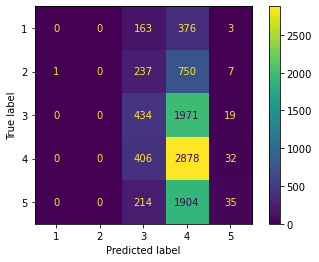

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(
    random_state=0).fit(xTrain, yTrain)
testModel(clf)

              precision    recall  f1-score   support

           1       0.14      0.07      0.10       542
           2       0.18      0.11      0.14       995
           3       0.29      0.38      0.33      2424
           4       0.37      0.44      0.40      3316
           5       0.31      0.21      0.25      2153

    accuracy                           0.32      9430
   macro avg       0.26      0.24      0.24      9430
weighted avg       0.30      0.32      0.30      9430



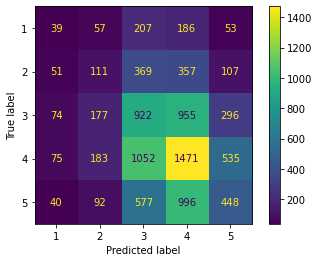

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
testModel(neigh)

              precision    recall  f1-score   support

           1       0.17      0.19      0.18       542
           2       0.16      0.18      0.17       995
           3       0.30      0.31      0.31      2424
           4       0.37      0.36      0.37      3316
           5       0.31      0.30      0.30      2153

    accuracy                           0.30      9430
   macro avg       0.26      0.27      0.27      9430
weighted avg       0.31      0.30      0.31      9430



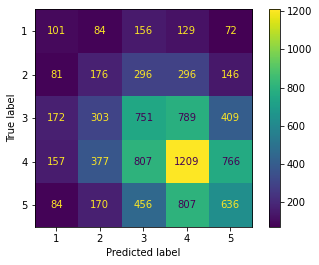

In [6]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
testModel(clf)

c:\Users\scarl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       542
           2       0.00      0.00      0.00       995
           3       0.30      0.21      0.25      2424
           4       0.37      0.81      0.51      3316
           5       0.35      0.06      0.10      2153

    accuracy                           0.35      9430
   macro avg       0.20      0.22      0.17      9430
weighted avg       0.29      0.35      0.26      9430



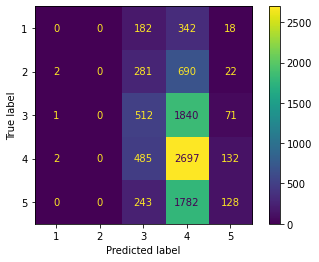

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
testModel(clf)
